[{'mid': '/m/085h1', 'title': 'World Trade Organization', 'type': 'Intergovernmental organization'}, {'mid': '/m/0n1_mzc', 'title': 'Wtorek', 'type': '2002 film'}, {'mid': '/m/0f7_n', 'title': 'Tuesday', 'type': 'Day of week'}, {'mid': '/m/07ssw', 'title': 'Utopia', 'type': 'Topic'}, {'mid': '/m/03w95yd', 'title': 'WTOB', 'type': 'Radio station'}]
World Trade Organization
                World Trade Organization
geoName                                 
Afghanistan                            0
Albania                                0
Algeria                                0
American Samoa                         0
Andorra                                0
             World Trade Organization
geoName                              
Philippines                       100
Nepal                              74
Tanzania                           57
Ethiopia                           51
China                              48


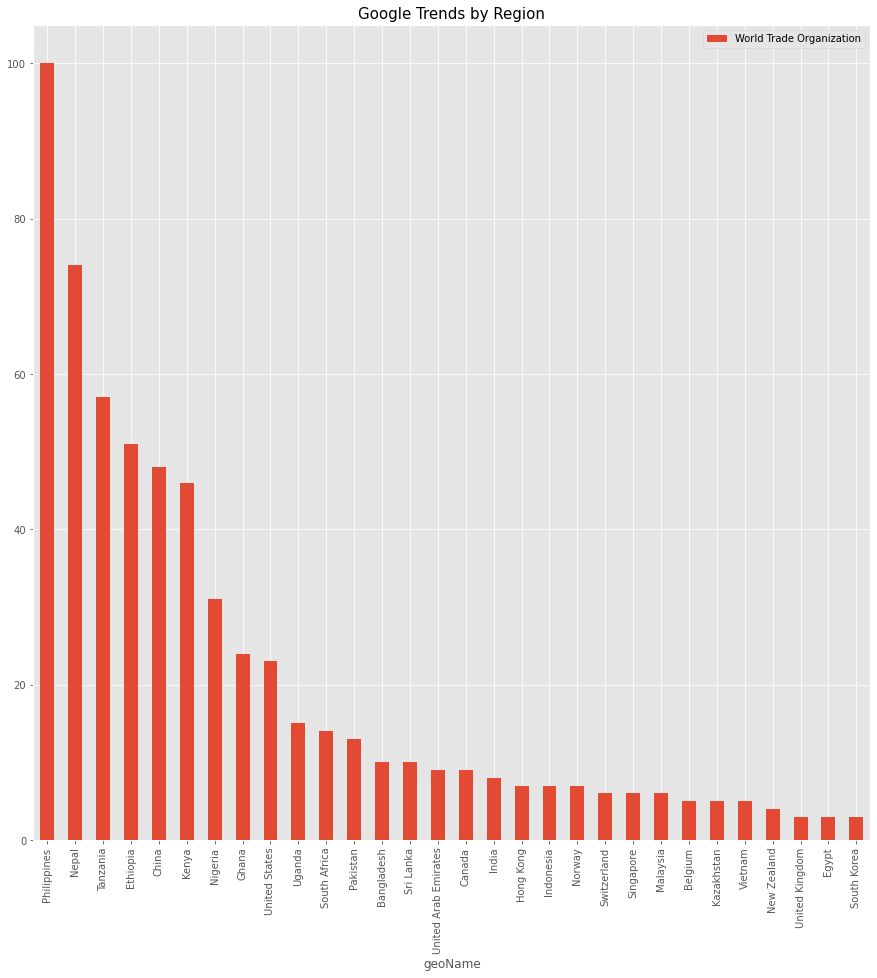

In [1]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import os

# Google Trend 접속
trend_obj = TrendReq()

# 검색 keyword에 대한 추천 검색어 확인
keyword = "WTO"
# .suggestions(keyword) 메소드에 검색 키워드를 전달하고 검색 객체에 적용하면, 해당 검색 키워드에 대한 구글의 추천 검색어를 리턴
suggested_keywords = trend_obj.suggestions(keyword)
print(suggested_keywords)

#### 추천 검색어 중에서 첫번째 검색어를 새로운 검색 키워드로 설정
new_keyword = suggested_keywords[0]['title']
print(new_keyword)

# 검색을 위한 데이터 탑재
period = "now 7-d"   #검색기간: 최근 7일
trend_obj.build_payload(kw_list=[new_keyword], timeframe=period)

# 상위 30개 지역을 선택
trend_df = trend_obj.interest_by_region()
print(trend_df.head())
trend_top30 = trend_df.sort_values(by=new_keyword, ascending=False).head(30)
print(trend_top30.head())

# 그래프 출력
plt.style.use("ggplot")
plt.figure(figsize=(15,15))
trend_top30[new_keyword].plot(kind='bar')
plt.title("Google Trends by Region", size=15)
plt.legend(labels=[new_keyword], loc="upper right")

# 그래프 파일 저장
cwd = os.getcwd()
output_filepath = os.path.join(cwd, "output", "google_trend_by_region_%s.png" % new_keyword)
plt.savefig(output_filepath, dpi=300)
plt.show()